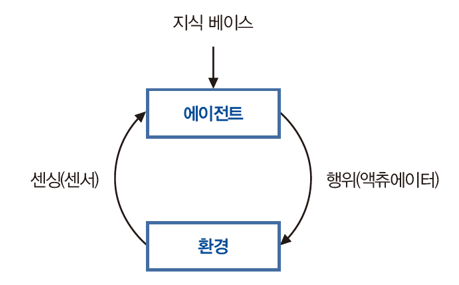

In [2]:
# 물체를 구분... 
# 인간 -> 주위를 센싱 -> 인식 -> 적절한 행위를통해 환경과 상호작용
# 인공지능 스피커 
# 전이학습의 결과를 응용해서 사용자 인터페이스를 붙이는 실습

# 에이전트 : 특정한 일을 대신 해 주는 사람--> 인공지능
from IPython.display import Image
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/60.PNG", width=200)

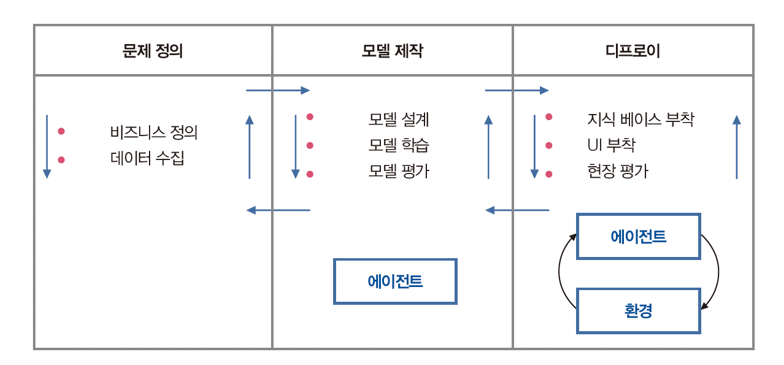

In [4]:
# 로봇.. 몸과 소프트웨어가 에이전트
# 카메라 등이 센서
# 팔이 액추에이터
# 지식 베이스 : 지식 표현을 위한 프레임, 의미망, 온톨로지, 규칙 기반 방법으로 구축
# 지능 에이전트의 라이프 사이클
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/61.PNG", width=500)

In [5]:
# 영상을 바구니에 담는 시나리오..
# 영상을 분류하고 분류 결과에 따라 해당 폴더에 영상을 저장하는 서비스 - 구글 포토와 비슷

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [6]:
# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

170508288/170498071 [==============================] - 13s 0us/step


In [12]:
# 신경망 설계  C-C-P-D  C-C-P-D F FC-D-FC
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu', input_shape=(32,32,3) ))
cnn.add(Conv2D(32,(3,3),activation='relu' ))
cnn.add(MaxPooling2D() )  # defualt 2,2
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu' ))
cnn.add(Conv2D(64,(3,3),activation='relu' ))
cnn.add(MaxPooling2D() )  # defualt 2,2
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

cnn.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer=Adam(),metrics = ['accuracy'])
hist = cnn.fit(x_train,y_train,batch_size=128, epochs=30,validation_data=(x_test,y_test),verbose=1)

res = cnn.evaluate(x_test,y_test)
print(f"정확률 {res[1]*100}")

Epoch 1/30
391/391 [==============================] - 15s 12ms/step - loss: 1.6632 - accuracy: 0.3905 - val_loss: 1.3117 - val_accuracy: 0.5334
Epoch 2/30
391/391 [==============================] - 4s 10ms/step - loss: 1.2602 - accuracy: 0.5524 - val_loss: 1.1443 - val_accuracy: 0.5904
Epoch 3/30
391/391 [==============================] - 4s 11ms/step - loss: 1.1033 - accuracy: 0.6084 - val_loss: 0.9610 - val_accuracy: 0.6573
Epoch 4/30
391/391 [==============================] - 4s 11ms/step - loss: 0.9825 - accuracy: 0.6543 - val_loss: 0.8838 - val_accuracy: 0.6869
Epoch 5/30
391/391 [==============================] - 4s 10ms/step - loss: 0.9028 - accuracy: 0.6816 - val_loss: 0.8162 - val_accuracy: 0.7151
Epoch 6/30
391/391 [==============================] - 4s 10ms/step - loss: 0.8414 - accuracy: 0.7045 - val_loss: 0.7653 - val_accuracy: 0.7313
Epoch 7/30
391/391 [==============================] - 4s 10ms/step - loss: 0.7832 - accuracy: 0.7252 - val_loss: 0.7486 - val_accuracy: 0.735

In [14]:
cnn.save("/content/drive/MyDrive/my_cnn_for_deploy.h5")

In [15]:
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck'] # CIFAR-10의 부류 이름